# Parses pulsar list from ATNF

https://www.atnf.csiro.au/research/pulsar/psrcat/

Magnitude estimates are calculated using equation 1 from https://arxiv.org/pdf/astro-ph/0402041.pdf:

$M \approx M_{Crab} - 2.5log[\frac{\dot{P}/P^3}{\dot{P}_{Crab}/P_{Crab}^3}(\frac{d_{Crab}}{d})^2]$

NS I = 1/5MR^2

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

name,ra,dec = np.genfromtxt('pulsars_jan.tsv',delimiter='\t',skip_header=62,missing_values=0,usecols=(0,1,2),dtype=None,unpack=True)
p0,p0_err,p_dot,p_dot_err,width,width_err,flux,flux_err,dist,age,B,Edot = np.genfromtxt('pulsars_jan.tsv',delimiter='\t',skip_header=62,missing_values=0,usecols=(3,4,5,6,7,8,9,10,11,12,13,14),unpack=True)

names = np.array(())

for i in name:
    i = i.strip()
    names = np.append(names,i.decode('utf-8'))

names_og = names.copy()
ra = ra.astype('str')
dec = dec.astype('str')

ra_new = np.array(())
dec_new = np.array(())

for i in range(ra.size):
    new = ra[i].split(' ')
    newd = dec[i].split(' ')
    value=0
    valued=0
    
    #RA
    if len(new) == 2:
        value = float(new[0])*15 + (float(new[1])/60)*15
    elif len(new) == 3:
        value = float(new[0])*15 + (float(new[1])/60)*15 + (float(new[2])/3600)*15
    ra_new = np.append(ra_new,value)
    
    #DEC
    if len(newd) == 2:
        valued = float(newd[0]) + float(newd[1])/60
    elif len(newd) == 3: 
        valued = float(newd[0]) + float(newd[1])/60 + float(newd[2])/3600
    dec_new = np.append(dec_new,valued)

mask_dec = np.where((dec_new > -14) & (dec_new < 90))

dec = dec[mask_dec]
ra = ra[mask_dec]
p_dot = p_dot[mask_dec]
p_dot_err = p_dot_err[mask_dec]
age = age[mask_dec]
dist = dist[mask_dec]
names = names[mask_dec]
p0 = p0[mask_dec]
p0_err = p0_err[mask_dec]
flux = flux[mask_dec]
flux_err = flux_err[mask_dec]
ra_new = ra_new[mask_dec]
B = B[mask_dec]
width = width[mask_dec]
width_err = width_err[mask_dec]
Edot = Edot[mask_dec]

"""mask_RA = np.where(((ra_new >= 0) & (ra_new < 360*2./24)) | ((ra_new >= 360*6./24) & (ra_new < 360*8./24)) | ((ra_new >= 360*8./24) & (ra_new < 360*10./24)) | ((ra_new >= 360*14./24) & (ra_new < 360*16./24)))

names = names[mask_RA]
ra = ra[mask_RA]
p_dot = p_dot[mask_RA]
p_dot_err = p_dot_err[mask_RA]
dec = dec[mask_RA]
age = age[mask_RA]
dist = dist[mask_RA]
p0 = p0[mask_RA]
p0_err = p0_err[mask_RA]
flux = flux[mask_RA]
flux_err = flux_err[mask_RA]
B = B[mask_RA]
width = width[mask_RA]
width_err = width_err[mask_RA]
"""
p_dot = p_dot.astype(np.float)
p0 = p0.astype(np.float)
dist = dist.astype(np.float)

p_crab = 0.0333924123
p_dot_crab = 4.20972e-13
d_crab = 2
m_crab = 16.073475194483873
mag = m_crab - 2.5*np.log10(((p_dot/p0**3)/(p_dot_crab/p_crab**3)) * (d_crab/dist)**2)
max_mag = m_crab - 2.5*np.log10(((p_dot/p0**3)/(p_dot_crab/p_crab**3)) * (d_crab/dist)**2)


mask = np.where((age>=0) & (dist >=0))

d = {'Name': names[mask], 'RA': ra[mask], 'DEC': dec[mask], 'Age (log)': np.log10(age[mask]), 'Distance (kpc)': dist[mask],'P (s)': p0[mask], 'P Error': p0_err[mask], 'dP/dt': p_dot[mask], 'dP/dt Error': p_dot_err[mask],'Flux Density (mJy @ 400 MHz)': flux[mask], 'Flux Density Error': flux_err[mask], 'B': B[mask], 'Pulse Width (ms)': width[mask],'Estimated Magnitude': max_mag[mask], 'Spin-down Energy':Edot[mask]}
df = pd.DataFrame(data=d)
df.sort_values(by=['Estimated Magnitude'], inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater_equal


,Name,RA,DEC,Age (log),Distance (kpc),P (s),P Error,dP/dt,dP/dt Error,Flux Density (mJy @ 400 MHz),Flux Density Error,B,Pulse Width (ms),Estimated Magnitude,Spin-down Energy
62,B0531+21,05 34 31.97,+22 00 52.1,3.100371,2.00,0.033392,1.200000e-09,4.209720e-13,3.000000e-18,550.00,100.00,3.790000e+12,3.0000,16.073475,4.500000e+38
29,J0205+6449,02 05 37.92,+64 49 41.3,3.729974,3.20,0.065716,9.000000e-14,1.937543e-13,4.000000e-21,NaN,NaN,3.610000e+12,2.3000,20.141751,2.700000e+37
843,J2229+6114,22 29 05.28,+61 14 09.3,4.021189,3.00,0.051624,6.000000e-11,7.827000e-14,2.000000e-17,1.50,NaN,2.030000e+12,4.0000,20.199578,2.200000e+37
307,J1833-1034,18 33 33.57,-10 34 07.5,3.685742,4.10,0.061884,1.200000e-13,2.020150e-13,4.000000e-21,NaN,NaN,3.580000e+12,2.5000,20.438879,3.400000e+37
777,J2021+3651,20 21 05.46,+36 51 04.8,4.235528,1.80,0.103741,4.000000e-12,9.572090e-14,7.000000e-19,NaN,NaN,3.190000e+12,9.9000,21.145072,3.400000e+36
84,J0633+1746,06 33 54.15,+17 46 12.9,5.534026,0.25,0.237099,2.000000e-12,1.097087e-14,5.000000e-20,NaN,NaN,1.630000e+12,NaN,21.902676,3.200000e+34
704,B1937+21,19 39 38.56,+21 34 59.1,8.371068,1.50,0.001558,1.000000e-16,1.051045e-19,8.000000e-25,240.00,NaN,4.090000e+08,0.0382,21.971854,1.100000e+36
92,B0656+14,06 59 48.13,+14 14 21.5,5.045323,0.28,0.384891,5.000000e-12,5.500309e-14,3.000000e-20,6.50,0.60,4.660000e+12,18.4000,21.976457,3.800000e+34
736,B1951+32,19 52 58.21,+32 52 40.5,5.029384,3.00,0.039531,1.100000e-12,5.844803e-15,8.000000e-21,7.00,1.00,4.860000e+11,4.7000,22.147331,3.700000e+36
569,J1907+0602,19 07 54.74,+06 02 16.9,4.290035,3.01,0.106633,5.000000e-12,8.682080e-14,3.000000e-19,NaN,NaN,3.080000e+12,NaN,22.457052,2.800000e+36


# Write observability parameters to text file for simulations

In [4]:
np.savetxt('atnf_observability.txt',np.c_[names[mask], p0[mask], width[mask], max_mag[mask]],fmt='%s')

# Plot parameter distributions

[1.55780656e-03 4.20251601e-03 1.13371848e-02 3.05844782e-02
 8.25081643e-02 2.22583401e-01 6.00466280e-01 1.61988608e+00
 4.36998879e+00 1.17889784e+01]


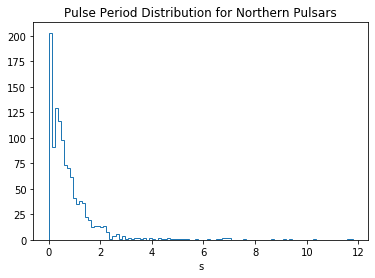

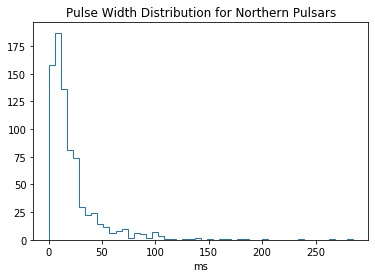

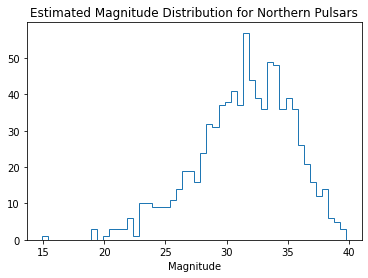

In [37]:
print(np.logspace(np.log10(min(p0)),np.log10(max(p0)),10))

plt.hist(p0,bins=100,histtype='step')
#plt.xscale('log')
#plt.yscale('log')
plt.title('Pulse Period Distribution for Northern Pulsars')
plt.xlabel('s')
plt.show()

plt.hist(width,bins=50,histtype='step')
#plt.xscale('log')
#plt.yscale('log')
plt.title('Pulse Width Distribution for Northern Pulsars')
plt.xlabel('ms')
plt.show()

plt.hist(max_mag[mask],bins=50,histtype='step')
#plt.yscale('log')
plt.title('Estimated Magnitude Distribution for Northern Pulsars')
plt.xlabel('Magnitude')
plt.show()

In [28]:
print(min(1/p0))
print(len(1/p0 < 1))
print(max(p0))

0.08482499212993723
1170
11.7889784
10.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [18]:
#median/mean pulse width to sub in for nan values in scripts
nonan = mag[~np.isnan(mag)]
noinf = nonan[~np.isinf(nonan)]
np.median(noinf)

31.77594714470049

In [4]:
optical_indices = np.array([36,42,43])

In [5]:
veritas_pulsars = np.array(['J0007+7303','J0023+0923','J0205+6449','J0218+4232','J0248+6021','J0357+3205','J0631+1036','J0633+0632','J0659+1414','J1907+0602','J1932+1916','J1939+2134','J1954+2836','J2021+3651','J2021+4026','J2032+4127','J2229+6114','J2238+5903','J2240+5832'])

mask = np.isin(names, veritas_pulsars)
print(names[mask])

['J0007+7303' 'J0023+0923' 'J0205+6449' 'J0218+4232' 'J0248+6021'
 'J0357+3205' 'J0631+1036' 'J0633+0632' 'J1907+0602' 'J1932+1916'
 'J1954+2836' 'J2021+3651' 'J2021+4026' 'J2032+4127' 'J2229+6114'
 'J2238+5903' 'J2240+5832']


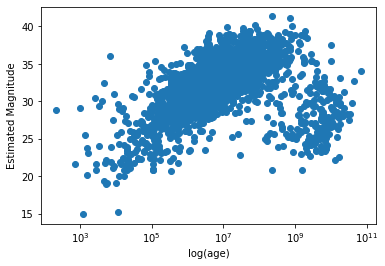

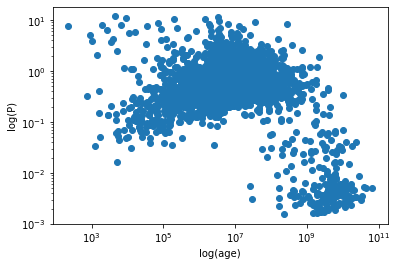

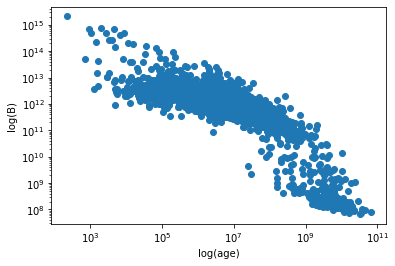

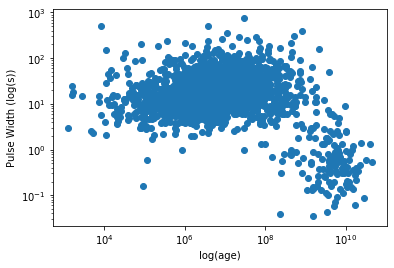

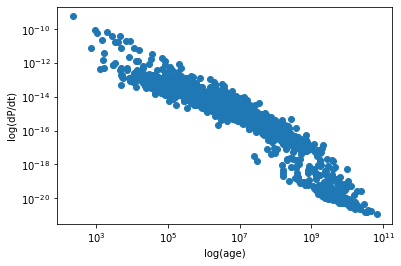

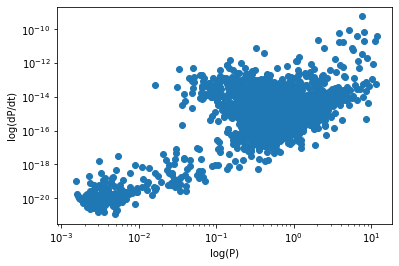

In [6]:
from matplotlib import pyplot as plt

plt.semilogx(age,max_mag,'o')
plt.xlabel('log(age)')
plt.ylabel('Estimated Magnitude')
plt.show()

plt.loglog(age,p0,'o')
plt.xlabel('log(age)')
plt.ylabel('log(P)')
plt.show()

plt.loglog(age,B,'o')
plt.xlabel('log(age)')
plt.ylabel('log(B)')
plt.show()

plt.loglog(age,width,'o')
plt.xlabel('log(age)')
plt.ylabel('Pulse Width (log(s))')
plt.show()

plt.loglog(age,p_dot,'o')
plt.xlabel('log(age)')
plt.ylabel('log(dP/dt)')
plt.show()

plt.loglog(p0,p_dot,'o')
plt.xlabel('log(P)')
plt.ylabel('log(dP/dt)')
plt.show()

In [7]:
names = np.array(['Crab','B0540-69','Geminga','B0656+14','Vela','B0950+08','B1055-52','B1509-58','B1929+10','J1023+0038'])
optical_p = np.array([0.0333924123,0.0505697030222,0.2370994416923,0.384928623365,0.089328385024,0.2530651649482,0.1971146895745,0.151581943393,0.2265187466568,0.0016879874702211])
optical_d = np.array([2.000,49.700,0.190,0.288,0.280,0.261,0.093,4.400,0.310,1.190])
optical_E = np.array([4.5e+38,1.5e+38,3.2e+34,3.8e+34,6.9e+36,5.6e+32,3.0e+34,1.7e+37,3.9e+33,5.7e+34])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Pulsar Observability Diagram')

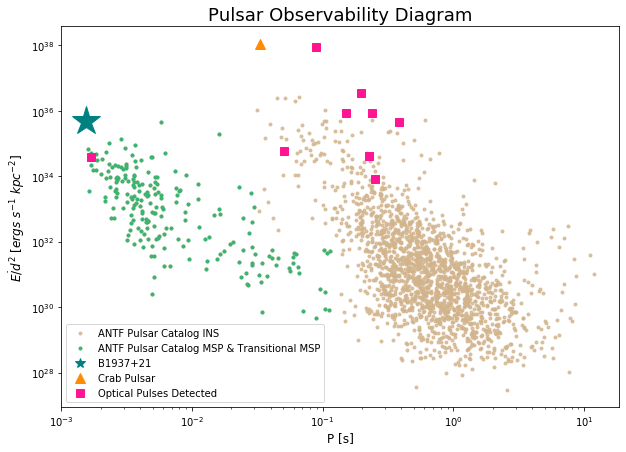

In [85]:
y_vals = Edot/dist**2

msp_ind = np.where(p0 < 1e-2)[0]
tmsp_ind = np.where((((p0 < 1.3e-1) & (y_vals < 1e32)) | ((p0 < 3e-2) & (y_vals < 1e37))) | (p0 < 1e-2))[0] 

plt.figure(figsize=(10,7))
plt.loglog(p0,y_vals,'tan',marker='.',alpha=0.8,ls='',label='ANTF Pulsar Catalog INS')
#plt.loglog(p0[msp_ind],y_vals[msp_ind],color='skyblue',ls='',marker='.',alpha=1,label='ANTF Pulsar Catalog MSP')
plt.loglog(p0[tmsp_ind],y_vals[tmsp_ind],color='mediumseagreen',marker='.',ls='',alpha=1,label='ANTF Pulsar Catalog MSP & Transitional MSP')

plt.loglog(p0[mask][1814],Edot[mask][1814]/dist[mask][1814]**2,'*',color='teal',label='B1937+21',markersize=10)
plt.loglog(p0[mask][1814],Edot[mask][1814]/dist[mask][1814]**2,'*',color='teal',markersize=30)
plt.loglog(optical_p[0],optical_E[0]/optical_d[0]**2,marker='^',color='darkorange',ls='',markersize=10,label='Crab Pulsar')
plt.loglog(optical_p[1:],optical_E[1:]/optical_d[1:]**2,marker='s',color='deeppink',ls='',markersize=8,label='Optical Pulses Detected')
plt.ylabel(r'$E\dot/d^2\ [ergs\ s^{-1}\ kpc^{-2}]$',fontsize=12)
plt.xlabel('P [s]',fontsize=12)
plt.legend()
"""plt.text(1.8e-3,7e29,'Millisecond Pulsars')
plt.text(1e-2,7e28,'Transitional Millisecond Pulsars')
plt.text(1e0,1e35,'Isolated Neutron Stars')"""

"""plt.axvspan(1e-3,1e-2,color='g',alpha=0.1)
plt.axvspan(1e-2,5e-2,color='b',alpha=0.1)
plt.axvspan(5e-2,1e1,color='r',alpha=0.1)"""

plt.title('Pulsar Observability Diagram',fontsize=18)

In [9]:
P = 0.001558
P_err = 1e-16
Pdot = 5.500309e-14
Pdot_err = 8e-25
Pc = 0.033392
Pc_err = 1.2e-9
Pc_dot = 4.209720e-13
Pc_dot_err = 3e-18
dc = 2.00
d = 3,6

num_unc = np.sqrt((Pdot_err/Pdot)**2 + (-3*P_err/P)**2)
denom_unc = np.sqrt((Pc_dot_err/Pc_dot)**2 + (-3*Pc_err/Pc)**2)

num = Pdot/P**3
denom = Pc_dot/Pc**3

tot_unc = np.sqrt((num_unc/num)**2 + (denom_unc/denom)**2)

sqbrac = ((Pdot/P**3)/(Pc_dot/Pc**3))*(dc/d)**2
err_brac = (1/np.log(10))*(tot_unc/sqbrac)

tot_err = np.sqrt((17.952364052439165)**2 + 2.5*(err_brac)**2)
tot_err

TypeError: unsupported operand type(s) for /: 'float' and 'tuple'

In [10]:
10**((-0.40355447*tot_err)+2.27458167)

NameError: name 'tot_err' is not defined

In [5]:
mag = 14.924744058962286 - 2.5*np.log10(((1.051045e-19/0.001558**3)/(4.209720e-13/0.033392**3))*(2.00/2.896)**2)
mag

22.252104280732055